In [20]:
import pandas as pd
import numpy as np

earthquake = pd.read_csv('/Users/wuchunting/Desktop/python/data cleaning challenge 3/data file/earthquake.csv')
eruption = pd.read_csv('/Users/wuchunting/Desktop/python/data cleaning challenge 3/data file/eruption.csv')
landslide= pd.read_csv('/Users/wuchunting/Desktop/python/data cleaning challenge 3/data file/landslide.csv')

np.random.seed(0)

In [21]:
#checking file earthquake
earthquake.head(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [24]:
earthquake['Date'].dtype

dtype('O')

In [43]:
#date is saved as an object 
#creating a new column 'date parsed' for earthquake dataframe

#earthquake['date parsed'] = pd.to_datetime(earthquake['Date'], format = '%m/%d/%Y')
#-> ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

#find rows can't be convert
#errors = 'coerce' forces the coversion 
#mask is a Series boolean mask
mask = pd.to_datetime(earthquake['Date'], errors = 'coerce', format="%m/%d/%Y").isnull()

#print the earthquake['Date'] values where Series 'mask' is True
print (earthquake['Date'][mask])

3378     1975-02-23T02:58:41.000Z
7512     1985-04-28T02:53:41.530Z
20650    2011-03-13T02:23:34.520Z
Name: Date, dtype: object


In [76]:
#creating a workaround to infer (detecting) the date format in earthquake['Date']
earthquake['parsedDate'] = pd.to_datetime(earthquake['Date'], infer_datetime_format=True, errors = 'coerce')

#checking cells in question: 3378, 7512, 20650
print(earthquake['parsedDate'].iloc[3378])
print(type(earthquake['parsedDate'].iloc[3378]))

#checking all rows are converted to datetime format
print(earthquake['parsedDate'].apply(type).unique())

#checking how many rows can't convert to datetime format
failedDate = earthquake['parsedDate'].isnull()
earthquake['parsedDate'].loc[failedDate]

NaT
<class 'pandas._libs.tslibs.nattype.NaTType'>
[<class 'pandas._libs.tslibs.timestamps.Timestamp'>
 <class 'pandas._libs.tslibs.nattype.NaTType'>]


3378    NaT
7512    NaT
20650   NaT
Name: parsedDate, dtype: datetime64[ns]

In [78]:
#getting day of month from earthquake['Parsed date']
earthquake['dayOfMonth'] = earthquake['parsedDate'].dt.day
earthquake['dayOfMonth']

0         2.0
1         4.0
2         5.0
3         8.0
4         9.0
         ... 
23407    28.0
23408    28.0
23409    28.0
23410    29.0
23411    30.0
Name: dayOfMonth, Length: 23412, dtype: float64

<AxesSubplot:xlabel='dayOfMonth'>

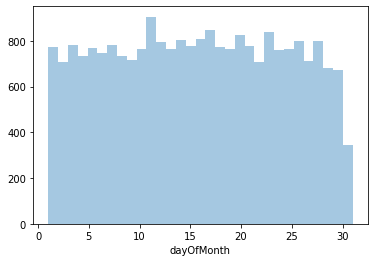

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# for Box-Cox Transformation
from scipy import stats

earthquake['dayOfMonth'] = earthquake['dayOfMonth'].dropna()
sns.distplot(earthquake['dayOfMonth'].dropna(), kde=False, bins= 31)

In [11]:
eruption.head(5)

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


In [14]:
landslide.head(5)


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
